<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 

# <center> R для тервера и матстата <br>  <br> Доверительные интервалы </center>

---------------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://github.com/FUlyankin/r_probability) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-----------

В этой тетрадке мы обсудим почему среднее это очень круто. Мы сделаем переход от точечных оценок к интервальным и попытаемся разобраться как строятся доверительные интервалы, а также обсудим __дельта-метод.__ Итак, план: 

* Схема матстата
* Мощь средних, асимптотические доверительные интервалы через ЦПТ 
* Асимптотический доверительные интервалы для долей
* Дельта-метод - обобщение для ЦПТ 
* Другие союзники, теорема Фишера, точные доверительные интервалы

In [3]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

In [4]:
# Код для строительства картинки. Как обычно, вы не обязаны понимать его, потому что картинки 
# обычно все копипастят из интернета, изменяя в коде кусочки методом тыка. 

# Взят отсюда: http://rstudio-pubs-static.s3.amazonaws.com/58753_13e35d9c089d4f55b176057235778679.html

# Область, которую надо будет закрасить на графике 
limitRange <- function(fun, min, max) {
    function(x) {
        y <- fun(x)
        y[x < min  |  x > max] <- NA
        return(y)
    }
}
  
# Наша функция для закрашивания области порождает функцию. Звучит сложно, но это не так :)
dlimit <- limitRange(dnorm, 0, 2)

# Новая функция будет искать значения плотности нормального распределения только на фиксированном диапазоне
dlimit(-2:4)

[1]         NA         NA 0.39894228 0.24197072 0.05399097         NA         NA

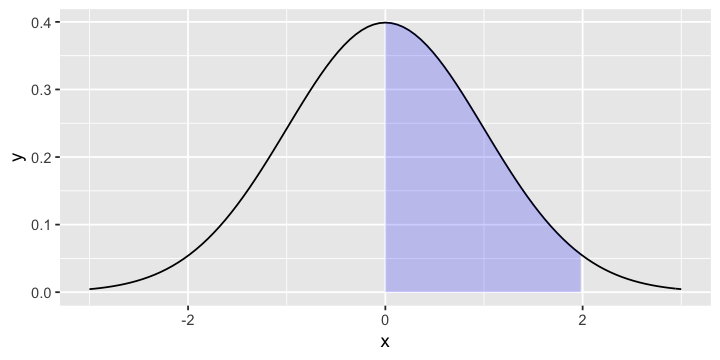

In [5]:
options(repr.plot.width=6, repr.plot.height=3)

dlimit <- limitRange(dnorm, 0, 2) # какую область красим в голубой

ggplot(data.frame(x=c(-3, 3)), aes(x = x))+
       stat_function(fun=dnorm) +  # вся функция 
       stat_function(fun=dlimit, geom="area", fill="blue", alpha=0.2) # область для закраски

# 1. Ещё раз про схему матстата 

Где-то в середине пары, мы нарисовали с вами на доске схему матстата. Давайте воспроизведём её и обсудим ещё раз. 

![КАРТИНКА](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2019/sem_5/matstat.jpg)

__Задача:__ мы уверены, что какая-то штука описывается каким-то распределением с параметром $\theta$. Чтобы понимать эту штуку, нам нужно параметр $\theta$ оценить. __Важно:__ мы препдполагаем, что $\theta$ - константа. 


__Оценивание:__ получить оценку $\hat \theta$ можно разными методами. Например, методом моментов или методом максимального правдоподобия. 


__Точечная оценка:__ Та оценка, которую мы поулчим будет функцией от выборки, то есть слуайной величиной. Если у нас есть одна выборка, то будет одна оценка. Если другая выборка, то будет немного другая оценка. На бы хотелось понимать насколько другой может оказаться оценка при новой выборке. Для этого нам нужно знать как эта оценка распределена. Зная распределение оценки, мы сможем посмотреть в каком диапазоне находится $95\%$ её вероятностной массы и сказать, что за края этого диапазона оценка будет вылетать редко. Этот диапозон называется доверительным интервалом. Если он получается коротким, то оценка довольно точная. Если длинным, то не очень.


__Распределение оценки:__ Чтобы построить для оценки параметра доверительный интервал, нужно знать как эта оценка распределена. Многие точечные оценки, которые мы до этого получали, имели вид: $\hat \theta = \bar x$. То есть просто являлись выборочным средним. Среднее это очень крутая штука. Оно по ЦПТ имеет асимптотически нормальное распределение.


__Доверительный интервал:__ Зная, что по ЦПТ 

$$ 
\bar x \sim N\left(\mu, \frac{\sigma^2}{n}\right),
$$ 

мы можем построить для случайной величины $\hat \theta = \bar x$ доверительный интервал

$$
(\bar x - 1.96 \cdot \hat \sigma; \quad \bar x + 1.96 \cdot \hat \sigma).
$$

В этом интервали по свойствам нормального распределения будет находится $95\%$ вероятностной массы. За него оценка при новых выборках будет вылетать очень редко. Если этот интервал короткий, оценка будет точной и прогнозы хорошими. Числа $1.96$ это квантили нормального распределения. Давайте я напомню вам определение квантиля. 

_Определение:_ Квантилем уровня $\alpha$ случайной величины $X$ называется такое значение $z_{\alpha}$ этой случайной величины, что $P(X \le X_{\alpha}) = \alpha$. Если вы ещё не забыли материалы первых пар, квантили можно искать командой `qnorm`.

In [6]:
qnorm(0.025)

[1] -1.959964

Число $-1.96$ это квантиль уровня $2.5\%$. Давайте нарисуем его на графике плотности. 

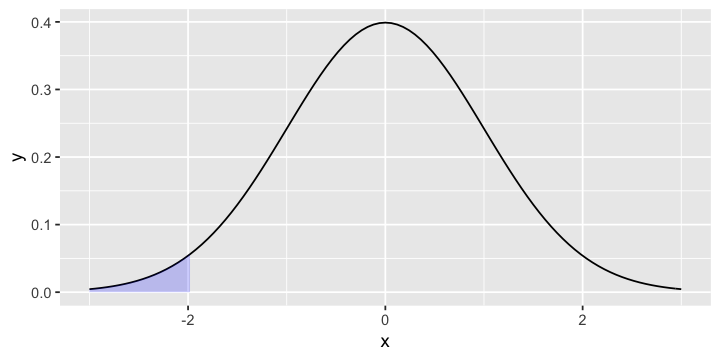

In [7]:
options(repr.plot.width=6, repr.plot.height=3)

dlimit <- limitRange(dnorm, -Inf, qnorm(0.05/2)) # какую область красим в голубой

ggplot(data.frame(x=c(-3, 3)), aes(x = x))+
       stat_function(fun=dnorm) +  # вся функция 
       stat_function(fun=dlimit, geom="area", fill="blue", alpha=0.2) # область для закраски

Величина $\alpha$ называется уровнем значимости. Это ошибка, на которую мы соглашаемся в самом начале эксперимента. Загадывая уровень значимости, мы говорим в скольки случаях из $100$ мы согласны ошибиться. Например, если мы упаковываем в рюкзаеи $100$ парашютов на уровне значимости $5\%$, значит в худшем случае $5$ парашютистов умрут.

В доверительном интервале ваше $\alpha = 0.05$. В принципе мы можем поменять его на любое другое значение и построить другой доверительный интервал. Как именно уровень значимости соотносится с квантиляями мы посмотрим ниже. 

__Что даёт:__ мы знаем точечную оценку, знаем её распределение, понимаем насколько она точная. Когда мы на основе наших оценок строим прогнозы на будущее, мы понимаем насколько точные они. Болеее того, зная распределение оценки, мы можем на его основе отвечать на различные вопросы, то есть проверять гипотезы. Но об этом мы поговорим позже. 

__ЦПТ и вcё?__ Нет. ЦПТ это только одна из теорем, подсказываюших нам какое именно будет распределение у оценки. Есть и другие теоремы, которые оказываются нашими союзниками. Например, делта-метод и теорема Фишера. О них мы тоже сегодня поговорим. 


Перед тем как двигаться дальше, вот вам определение доверительного интервала из лекций: 

__Определение:__  интервал  $(\theta_L; \theta_R)$ называеся доверительным интервалом для параметра $\theta$ с уровнем доверия $\gamma$, если  при бесконечном повторении эксперимента в $100 \cdot \gamma \%$ случаев этот интервал будет накрывать истиное значение параметра $\theta$. При этом $\gamma = 1 - \alpha$. 

# 2. Мощь средних и асимптотические доверительные интервалы



__Ещё раз, ещё раз.__ Среднее хорошо тем, что есть ЦПТ, которая говорит нам, что 

$$ 
\bar x \sim N\left(\mu, \frac{\sigma^2}{n}\right),
$$ 

На основе этого мы можем построить для среднего доверительный интервал. Давайте сделаем это для конкретного примера. Например, для Ульяны, которая любит игру престолов. 

## 2.1 Ульяна смотрит игру престолов

Ульяна любит сериалы! Конечно же Игра Престолов не обошла её стороной. Она смотрит её каждый день. Пусть $X$ - число серий, которое Ульяна просмотрела за день. Понятное дело, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра. Не забыли же ещё, что случайные величины счётчики можно (но не обязательно) моделировать с помощью распределения Пуассона? 

Ульяне стало интересно с какой интенсивностью она смотрит сериалы, и теперь она хочет построить для $\lambda$ оценку методом моментов, а после доверительный интервал для неё. 

In [8]:
# давайте спросим у Ульяны сколько серий она посмотрела на этой неделе
x <- c(5, 7, 8, 2, 3, 1, 2)

Чтобы получить оценку методом моментов, нам нужно решить уравнение

$$ 
E(X) = \bar x
$$ 

Для распределиния Пуассона, $E(X) = \lambda$. Получается, что $\hat \lambda = \bar x$. Оценка готова. 

In [9]:
lam_hat = mean(x)
lam_hat

[1] 4

Наша оценка это чистое среднее. По ЦПТ оно имеет асимптотически нормальное распределение 

$$
\hat \lambda = \bar x \sim N\left(E(\hat \lambda), Var(\hat \lambda)\right).
$$

Давайте найдём для этой оценки математическое ожидание и дисперсию: 

$$
\begin{aligned}
&E(\hat \lambda) = E(\bar x) =  E \left( \frac{1}{n} \sum_{i=1}^n X_i \right) = \frac{1}{n} \sum_{i=1}^n E(X_i) = \frac{1}{n} \sum_{i=1}^n \lambda = \lambda \\ 
&Var(\hat \lambda) = Var(\bar x) =  Var \left( \frac{1}{n} \sum_{i=1}^n X_i \right) = \frac{1}{n^2} \sum_{i=1}^n Var(X_i) = \frac{\lambda}{n}.
\end{aligned}
$$

Не забываем, что в случае дисперсии мы воспользовались тем, что наблюдения независимы между собой. 

Выходит, что 

$$
\hat \lambda \sim N \left(\lambda, \frac{\lambda}{n} \right).
$$

Есть беда. Она заключается в том, что в дисперсии фигурирует неизвестная нам $\lambda$. Давайте просто заменим её на $\hat \lambda$. Из-за этого ничего не испортится. Почему ничего не испортится, я объясню ниже. Пока что просто смиритесь с этим. Теперь мы знаем, что 

$$
\hat \lambda \sim N \left(\lambda, \frac{\hat \lambda}{n} \right).
$$

и можем построить доверительный интервал. Перепишем выражение выше в терминах стандартного нормального распределения. Для этого пронормируем случайную величину (вычтем среднее) и отскалируем её (поделим на стандартное отклонение):

$$
\frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}} \sim N (0,1)
$$


Получается, что

$$
P \left( -1.96 \le \frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}}  \le 1.96 \right) = 0.95
$$

Если мы возьмём другой уровень значимости, мы можем построить другой доверительный интервал:

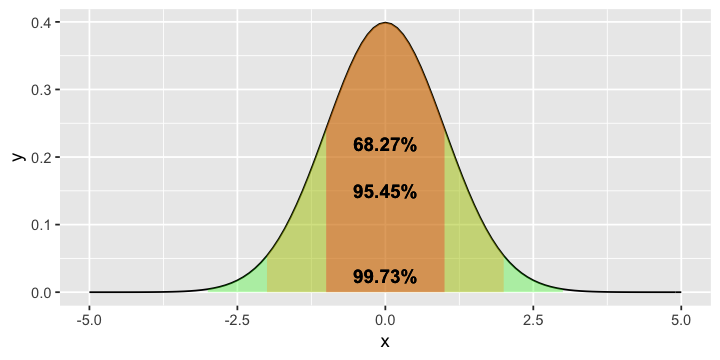

In [10]:
options(repr.plot.width=6, repr.plot.height=3)

dnorm_one_sd <- limitRange(dnorm, -1, 1) 
dnorm_two_sd <- limitRange(dnorm, -2, 2)  
dnorm_three_sd <- limitRange(dnorm, -3, 3)  

ggplot(data.frame(x=c(-5, 5)), aes(x = x))+
        stat_function(fun = dnorm) +  
        stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
        stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
        stat_function(fun = dnorm_one_sd, geom = "area", fill = "red", alpha = 0.3) +
        geom_text(x = 0, y = 0.22, size = 4, fontface = "bold",
        label = paste0(round(pnorm(1) - pnorm(-1), 4) * 100, "%")) +
        geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
        label = paste0(round(pnorm(2) - pnorm(-2), 4) * 100, "%")) +
        geom_text(x = 0, y = 0.025, size = 4, fontface = "bold",
        label = paste0(round(pnorm(3) - pnorm(-3), 4) * 100, "%"))

Обычно пытаются оставить $\frac{\alpha}{2}$ в левом хвосте и столько же в правом хвосте, чтобы интервал получился максимально коротким.  То есть наш интервал имеет вид

$$
P \left( -z_{1 - \frac{\alpha}{2}} \le \frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}}  \le z_{1 - \frac{\alpha}{2}}  \right) = 1 - \alpha.
$$

Можно переписать определение квантиля немного иным языком. Так как $P(X \le X_{\alpha}) = F_{X} (\alpha)$, мы можем написать, что $X_{\alpha} = F^{-1}_X (\alpha)$. Тогда можно записать асимптотический $(1-\alpha)\%$ доверительный интервал для произвольного значения $\alpha$:

$$
F^{-1}_{\hat \lambda}\left(\frac{\alpha}{2}\right) \le \lambda \le F^{-1}_{\hat \lambda}\left(1 -\frac{\alpha}{2}\right)
$$

Вернёмся к нашей ситуации с Ульяной. Заменим $1.96$ на произвольное $z_{1 - \frac{\alpha}{2}$. Доверительный интервал будет выглядеть как

$$
\hat \lambda \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \lambda}{n}}.
$$

Первый виток теории исчерпан. Строим доверительный интервал: 

In [1]:
alpha = 0.95                   # задаём уровень доверия 
z_alpha = qnorm(1 - alpha/2)   # из нормального распределения автоматически посчитался квантиль

lam_hat = mean(x)                # нашли оценку параметра 
lam_se = sqrt(lam_hat/length(x)) # оценили стандартное отклонение 

# по формулам посчитали границы
lam_left = lam_hat - z_alpha*lam_se
lam_right = lam_hat + z_alpha*lam_se
cat('Доверительный интервал:', lam_left, lam_right)

ERROR: Error in mean(x): объект 'x' не найден


## 2.2 У Ульяны биполярочка 

Повышаем планочку абстракции. Пусть теперь у Ульяны биполярочка. Она себе завела воображаемого друга по имени Таня. Теперь они смотрят сериалы вдвоём. Каждая со своей интенсивностью $\lambda_i$. 

Ульяна считает, что она опережает Таню по интенсивности просмотра. Нужно построить доверительный интервал для разности $\lambda_1 - \lambda_2$ и понять правда ли, что Ульяна впереди. Для простоты будем считать, что Ульяна и Таня смотрят сериалы независимо друг от друга. 

In [28]:
x <- c(5, 7, 8, 2, 3, 1, 2)  # Ульяна
y <- c(4, 8, 9, 1, 2, 2, 2)  # Таня 

Оценка для Ульяны это $\hat \lambda_1 = \bar x$. Оценка для Тани это $\hat \lambda_2 = \bar y$. Два средних. Построены по независимым выборкам. Для обоих работает ЦПТ. Выходит, что 

\begin{equation*}
\begin{aligned}
\hat \lambda_1 = \bar x  \sim N \left(\lambda_1, \frac{\hat \lambda_1}{n_1} \right)\\
\hat \lambda_2 = \bar y  \sim N \left(\lambda_2, \frac{\hat \lambda_2}{n_2} \right).
\end{aligned} 
\end{equation*}

Математическое ожидание и дисперсию мы выше посчитали. Теперь нас интересует распределение случайной величины $\hat \lambda_1 - \hat \lambda_2$. Мы помним из курса по теории вероятностей, что сумма (ну или разность) нормально распределённых случайных величин снова нормальна. Давайте найдём её характеристики. 

$$
\begin{aligned}
& E(\hat \lambda_1 - \hat \lambda_2) = \lambda_1 - \lambda_2 \\
& Var(\hat \lambda_1 - \hat \lambda_2) = Var(\hat \lambda_1) + Var(\hat \lambda_2) = \frac{\lambda_1}{n_1} + \frac{\lambda_2}{n_2} 
\end{aligned}
$$

Получается, что 

$$
\hat \lambda_1 - \hat \lambda_2 \sim N \left( \lambda_1 - \lambda_2, \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} \right).
$$

Отсюда можно легко найти доверительный интервал для разности интенсивностей: 

$$
\hat{\lambda}_1 - \hat{\lambda}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{\lambda}_1}{n_1} + \frac{\hat{\lambda}_2}{n_2}}
$$

Построим его. 

In [31]:
alpha = 0.05
z_alpha = qnorm(1 - alpha/2)

diff = mean(x) - mean(y)
diff_se = sqrt(mean(x)/length(x) + mean(y)/length(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se
cat('Доверительный интервал:', left, right)

Доверительный интервал: -2.09529 2.09529

Доверительный интервал покрывает ноль. Это означает, что Ульяна и аня смотрят сериал с одинаковой интенсивностью. Угадайте как часто мы сделаем ошибку, утверждая это? Правильно! В $5\%$ случаев. Фактически мы с вами только что проверили на уровне значимости $5\%$ гипотезу о равенстве средних.

## 2.3 Нюанс с заменой $\lambda$ на $\hat \lambda$

Выше, в пункте $2.1$, мы написали, что по ЦПТ 

$$
\hat \lambda \sim N \left(\lambda,  \right).
$$

Потом мы сказали, что есть беда. Она заключается в том, что в дисперсии фигурирует неизвестная нам $\lambda$. Мы просто заменили её на $\hat \lambda$. И сказали, что 

$$
\hat \lambda \sim N \left(\lambda, \frac{\hat \lambda}{n} \right).
$$

Давайте докажем, что при такой замене вообще ничего не портится. Потому что это неочевидный финт ушами. По ЦПТ у нас

$$
\frac{\hat \lambda - \lambda}{\sqrt{\frac{\lambda}{n}}} \Rightarrow N(0,1)
$$

Давайте домножим это добро на 

$$
1 = \frac{\sqrt{\frac{\hat \lambda}{n}}}{\sqrt{\frac{\hat \lambda}{n}}}
$$

Получится, что 

$$
\frac{\hat \lambda - \lambda}{\sqrt{\frac{\lambda}{n}}} \cdot \frac{\sqrt{\frac{\hat \lambda}{n}}}{\sqrt{\frac{\hat \lambda}{n}}} \Rightarrow N(0,1)
$$

Переставим местами знаменатели. 

$$
\frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}} \cdot \frac{\sqrt{\frac{\hat \lambda}{n}}}{\sqrt{\frac{\lambda}{n}}} \Rightarrow N(0,1)
$$

Наша оценка состоятельная, то есть $\hat \lambda \to \lambda$ по вероятности. Выходит, что $$\sqrt{\frac{\hat \lambda}{n}} \to \sqrt{\frac{\lambda}{n}}$$ по вероятности. Второй множитель ушёл в единицу. Получается, что 

$$
\frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}} \cdot \frac{\sqrt{\frac{\hat \lambda}{n}}}{\sqrt{\frac{\lambda}{n}}}  =  \frac{\hat \lambda - \lambda}{\sqrt{\frac{\hat \lambda}{n}}} \Rightarrow N(0,1),
$$

и сходимость при замене $\lambda$ на $\hat \lambda$ не портится. 

# 3. Асимптотические доверительные интервалы для долей

## 3.1 Интервал для одной доли

Давайте повторим ровно те же рассуждения, что и выше, но уже для случая долей. Пусть у нас есть какой-то продукт. Например, кофе. Нам хотелось бы оценить какой доле людей нравится наш кофе. Введём случайную величину: 

$$
X = \begin{cases} 1, \text{ человеку нравится} \\ 0, \text{ иначе} \end{cases}.
$$

Такая случайная величина имеет распределение Бернулли с параметром $p$ - вероятностью, что люди любят наш кофе, $ X \sim Ber(p)$.

Измерить любовь к кофе можно с помощью опроса. Если в нём примут участие $n$ человек, то на выходе мы получим выборку, состоящую из нулей и единиц. Оценкой любви к кофе будет выборочная доля:

$$
\hat p = \frac{1}{n} \sum_{i=1}^n x_i.
$$

По сути, эта оценка является выборочным средним. Значит мы можем воспользоваться ЦПТ и сказать, что: 

$$
\hat p \sim N\left(E(X), \frac{Var(X)}{n}\right).
$$

Для случайной величины, имеющей распределение Бернулли $E(X) = p$, $Var(X) = p \cdot (1-p)$. Значит 

$$
\hat p \sim N \left(p, \frac{p \cdot (1-p)}{n}\right).
$$

Либо, иными словами говоря 

$$ 
\frac{ \hat p - p}{\sqrt{\frac{p \cdot (1-p)}{n}}} \sim N(0,1)
$$



В параметрах распределения находится $p$, которое мы не знаем. Мы можем оценить их, подставив туда вместо $p$ его оценку. Тогда распределение параметра будет для нас полностью известно. Теперь, если от нас требуют $95%$ доверительный интервал, мы можем сказать, что 

$$
P\left( -1.96 \le \frac{ \hat p - p}{\sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}}} \le 1.96\right) = 0.95.
$$

Немного раскрываем неравенство и получаем, что: 

$$
P\left(\hat p - 1.96 \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}} \le p \le \hat p + 1.96 \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}} \right) = 0.95.
$$

Это выражение и будет $95\%$ доверительным интервалом для доли любителей кофе. Если мы начнём собирать выборку по кофеманам и выясним, что для $n=10$, $\hat p = 0.6$, доверительный интервал окажется равен $(0.29; 0.91)$. Если окажется, что для $n=100$, $\hat p = 0.44$, то доверительный интервал окажется равен $(0.34; 0.54)$. 

Для второй ситуации он оказался намного уже. При сотне наблюдений наша уверенность в оценке увеличилась. Обратите внимание, что при $n=10$ мы поулчили оценку $0.6$. Доверительный интервал при этом не исключал возможность того, что истиный параметр равен $0.44$. В то же самое время, при сотне наблюдений вероятность того, что истиное значение параметра равно $0.6$ довольно сильно упала. Вот такие вот доверительные интервалы. 


Отлично! Давайте сгенерируем немного данных и построим доверительных интервалов для долей.  Зафиксируем зерно генерации (вспомните зачем это делается) и создадим огромную генеральную совокупность. Давайте считать, что это генеральная совокупность состоит из любителей кофе. Один означает, что человек любит кофе, нолик что нет. Всего в городе живет $100000$ человек.

In [13]:
set.seed(42) # помните, что seed нужен для воспроизводимости? 
x_general = sample(x = c(0,1), prob = c(0.3,0.7), size = 10^5, replace = TRUE)

Представим себе, что мы не знаем что находится в генеральной совокупности. Две строчки выше за нас запустила природа. И не показала их нам. 

Мы, как исследователи, понимаем, что опрашивать каждого из ста тысяч дорого. Но долю любетелей кофе оценить хотелось бы. Поэтому мы решаем опросить $100$ случайных человек. 

In [14]:
set.seed(42)
x_sample = sample(size = 100, x_general) # случайная выборка из генеральной совокупности

Вот у нас и появилась выборка. Мы можем получить точечную оценку доли, напрмер, воспользовавшись методом максимального правдоподобия. Это будет среднее. 

In [15]:
mean(x_sample)

[1] 0.67

При этом реальное, посчитанное по всей генеральной совокупности среднее будет

In [16]:
mean(x_general)

[1] 0.69773

Мы не знаем его. У нас есть точечная оценка и мы хотим построить по ней доверительный интервал. Мы знаем, что 

$$
\hat p \sim N \left(p, \frac{p \cdot (1-p)}{n}\right).
$$

Значит доверительный интервал для доли будет выглядеть как:

$$
\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}
$$

Дело за малым, найти интервал:

In [17]:
p_hat = mean(x_sample) # оценка
p_hat

sd_p = sqrt(p_hat*(1-p_hat)/100) # стандартное отклонение оценки 
sd_p

[1] 0.67

[1] 0.04702127

In [18]:
# по формуле расчитываем интервал: 

p_left  = p_hat - qnorm(1-0.05/2)*sd_p
p_right = p_hat + qnorm(1-0.05/2)*sd_p
cat('Параметр p с вероятностью 95% лежит между',p_left, 'и',p_right, '\n')
cat('Длина интервала:', p_right-p_left)

Параметр p с вероятностью 95% лежит между 0.57784 и 0.76216 
Длина интервала: 0.18432

Ясное дело, что если мы возьмём в выборку большее число респондентов, интервал станет уже. Давайте пронаблюдаем вместо $100$ целую $1000$ людей. 

In [19]:
set.seed(42)
x_sample = sample(size = 1000, x_general)

p_hat = mean(x_sample)
sd_p = sqrt(p_hat*(1-p_hat)/1000)

p_left  = p_hat - qnorm(1-0.05/2)*sd_p
p_right = p_hat + qnorm(1-0.05/2)*sd_p
cat('Параметр p с вероятностью 95% лежит между',p_left, 'и',p_right, '\n')
cat('Длина интервала:', p_right-p_left)

Параметр p с вероятностью 95% лежит между 0.6439243 и 0.7020757 
Длина интервала: 0.05815131

В связи с этим может возникнуть вопрос: а какое количество наблюдений надо взять, чтобы интервал получился заданной ширины? К счастью это не проблема. Ширину доверительного интервала можно вычислить как:

$$
p_{right} - p_{left} = 2 \cdot z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}
$$

Отсюда можно посчитать число наблюдений, которое нам необходимо для строительства доверительного интервала фиксированной ширины:

$$
n = \frac{4 z^2 \cdot p \cdot (1-p)}{(p_{left} - p_{right})^2}
$$

Давайте проговорим как это интерпретировать. Мы можем заранее заказать точность оценки $p_{right} - p_{left}$ и ошибку, которую мы согласны допустить $\alpha$. И отталкиваясь от этих двух вещей понять сколько нам нужно наблюдений. Запомните этот момент, он снова всплывёт в проверке гипотез. 

In [23]:
# функция, которая это посчитает :) 

sample_len <- function(alpha, len){
    return(4*qnorm(1 - alpha/2)^2*p_hat*(1 - p_hat)/len^2)
    }

sample_len(0.05, 0.1)  # для длины 0.1  и ошибки 0.05 нужно 338 наблюдения
sample_len(0.05, 0.05) # для длины 0.05 и ошибки 0.05 нужно 1352 наблюдения
sample_len(0.1, 0.05)  # для длины 0.05 и ошибки 0.1  нужно 1352 наблюдения

[1] 338.1575

[1] 1352.63

[1] 952.6586

Ясное дело, что можно сделать всё это в рамках какого-нибудь пакета. Например, в пакете `binom` присутствует довольно много разных методов построения доверительных интервалов для долей. 

In [24]:
library('binom')
binom.confint(sum(x_sample), length(x_sample), conf.level = 0.95, methods = 'asymptotic')

method,x,n,mean,lower,upper
asymptotic,673,1000,0.673,0.6439243,0.7020757


С помощью этого же пакета можно выяснить какой будет ширина доверительного интервала для доли при фиксированном числе наблюдений.

In [25]:
binom.length(p = p_hat, n = c(10,50,100,1000), methods = 'asymptotic')

method,n,p,length
asymptotic,10,0.673,0.54172133
asymptotic,50,0.673,0.25704406
asymptotic,100,0.673,0.18283545
asymptotic,1000,0.673,0.05811825


Какие другие методы есть в пакете? Например, есть доверительный интервал Уилсона. Это улучшенный доверительный интервал, который даёт качественные оценки на границах. При доле близкой к нулю или единице. Он не даёт пробить границу. Также неплох для малых выборок.

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 


In [26]:
set.seed(42)
x_sample = sample(x = c(0,1), prob = c(0.01,0.99), size = 100, replace = TRUE)

binom.confint(sum(x_sample), length(x_sample), conf.level = 0.95, methods = c('asymptotic', 'wilson'))

method,x,n,mean,lower,upper
asymptotic,100,100,1,1.0000000,1
wilson,100,100,1,0.9630065,1


In [27]:
mean(x_sample)

[1] 1

Видим, что обычный асимптотический интервал немножечко нас подвёл, а интервал Уилсона оказался устойчив к проблемам с выборкой, в которую попали одни единицы.

## 3.2 Интервал для двух долей.

Выше мы с вами выяснили как построить доверительный интервал для доли. Иногда требуется сделать это для разности долей. Представим себе товар, который нужно рекламировать. Для этих целей используется рекламный баннер. Если появляется новый баннер, который кажется более красивым, то возникает необходимость проверить какой из баннеров лучше, а также понять насколько новый баннер красивее первого. 

В нашем распоряжении есть выборка из кликов по первому банеру, $X$ и по второму банеру, $Y$.

$$
\begin{aligned}
X_1, \ldots, X_{n_1} \sim iid \hspace{1mm} Bern(p_1) \\
Y_1, \ldots, Y_{n_2} \sim iid \hspace{1mm} Bern(p_1)
\end{aligned}
$$

Мы можем найти оценки для обеих вероятностей через средние. Оба средних будут иметь асимптотически нормальные распределения со своими параметрами: 

$$
\begin{aligned}
\hat p_1 = \bar x \sim N \left(p_1, \frac{p_1(1-p_1)}{n_1} \right)\\
\hat p_2 = \bar y \sim N \left(p_2, \frac{p_2(1-p_2)}{n_2} \right)
\end{aligned}
$$

Если выборки независимы, разность долей будет тоже иметь асимптотически нормальное распределение! Его параметры довольно легко найти: 

$$
\hat p_1 - \hat p_2  \sim N \left(p_1 - p_2, \frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2} \right).
$$

Отсюда можно легко найти доверительный интервал для разности долей: 

$$
\hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}
$$

In [29]:
z = qnorm(1 - 0.05/2)
p1 = 0.6  # Возьмём цифры просто из головы
p2 = 0.5  # Ясное дело, их можно посчитать по выборке
n1 = 10
n2 = 100

sd = sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
left  = (p1 - p2) - z*sd
right = (p1 - p2) + z*sd

cat('Разность p1-p2 с вероятностью 95% лежит между', left, 'и', right, '\n')
cat('Длина интервала:', right - left)

Разность p1-p2 с вероятностью 95% лежит между -0.219059 и 0.419059 
Длина интервала: 0.638118

__Важно:__ всё, что было написано выше, работает только в ситуации, когда выборки $X$ и $Y$ независимы друг от друга. Если между ними ест взаимосвязь (например, оба баннера кликали одни и те же люди), то доверительные интервалы строят немного по другой методике, учитывающей эту взаимосвязь. Но об этом мы будем разговаривать чуть позже. 

# 4. Дельта-метод 

## 4.1 Зачем? 

Очень часто оценки, которые мы получаем выражаются через средние. Например, типичная оценка, полученая методом моментов может выглядеть как-нибудь так: 

$$
\hat \theta = \frac{\overline{x^2} - \bar x}{\overline{ \ln x}}. 
$$

Было бы круто построить для таких оценок доверительные интервалы. Для этого нужно знать распределение $\hat \theta$.  Дельта-метод позволяет его получить. Сам по себе он является обобщением центральной предельной теоремы. 

__Теорема (дельта-метод):__ 

Если $X_1, \ldots, X_n$ независимые одинаково распределённые случайные величины с математическим ожиданием $\mu$ и дисперсией $\sigma^2$, а $g(t)$ диференцируемая на множестве действительных чисел функция, тогда случайная величина $g(\bar X)$ будет иметь асимптотически нормальное распределение с математическим ожиданием $g(\mu)$ и дисперсией $\frac{\sigma^2}{n} \cdot (g'(\mu))^2$. То есть

$$
g(\bar X) \sim N \left( g(\mu), \frac{\sigma^2}{n} \cdot (g'(\mu))^2 \right).
$$

Для примера, давайте посмотрим на ситуацию, когда случайные величины $X_1, \ldots, X_n$ взяты из распределения равномерного на отрезке $[2; 8]$, тогда:

$$ \frac{1}{\bar x} \sim N \left(\frac{1}{5}, \frac{3}{n} \cdot \left(\frac{1}{25}\right)^2 \right)$$

Давайте попробуем убидиться в этом на симуляциях. Возьмём $n=100$. 


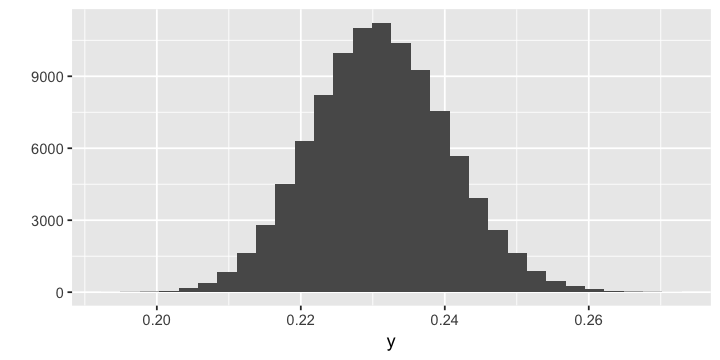

In [153]:
n_obs = 10^5       # симуляция может быть много!
y = rep(0,n_obs)
for(i in 1:n_obs){
    y[i] = mean(1/runif(100, 2, 8)) # но среднее по выборке 100! 
}

# Получается милый купол 
# Понимаете ли вы, почему он не выходит за отрезок 0,1
# Понимаете ли вы, почему мы говорим при этом про нормальное распределение?! 

# Правильно! Все теоремы выше являются асимптотическими, то есть распределение Y
# хорошо приближается нормальным при большом n, но нормальным оно не является. 
# Оно становится им только при бесконечном n.

qplot(y, bins=30)

In [154]:
mean(y) # близко к 1/5

[1] 0.2310466

[Страничка про дельта-метод](https://github.com/bdemeshev/pr201/blob/master/delta_method/delta_method.pdf) от Демешева.

## 4.2 Дельта-Ульяна

Вспоминаем про Ульяну и попробуем построить доверительный интервал для неё. Для параметра $\lambda^2$ логично взять в качестве оценки $\bar x^2$. Давайте воспользуемся дельта-методом и построим для такой оценки асимптотический доверительный интервал. 

$$
\begin{aligned}
E(X) &= Var(X) = \lambda \\ 
g(t) &= t^2 \\ 
g'(t) &= 2t \\
\end{aligned}
$$

В итоге получаем, что 

$$\bar x^2 \sim N \left(\lambda^2, \frac{\lambda}{n} \cdot 4 \lambda^2  \right).$$ 

Лямбду в дисперсии можно заменить на оценку, а потом, разрешив неравенство, получить доверительный интервал:

$$
\bar x^2 \pm  z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{4 \bar x^3}{n}}
$$

In [156]:
mean(x)^2 - z_alpha*sqrt(4*mean(x)^3/length(x))

[1] 16091.17

In [157]:
mean(x)^2 + z_alpha*sqrt(4*mean(x)^3/length(x))

[1] 16419.58

Вот такие вот пироги! Надеюсь, что вы что-то почувствовали, решая эту задачку и у вас в голове выработалось понимание, что в матстате нет отдельных сюжетов и всё довольно сильно переплетено. Дальше мы попытаемся развить эту интуицию.

# 5. Кто наши союзники? 

Выше мы увидели двух союзников.

* ЦПТ позволяет строить доверительные интервалы для средних 
* Дельта-метод обобщает ЦПТ на случай функции от средних (ну либо других нормальных случайных величин) 

Кроме этих двух теорем у нас есть куча других союзников: 

* Распределение хи-квадрат

$$
\chi^2_n = [N(0,1)]^2 + \ldots + [N(0,1)]^2 
$$

* Распределение стьюдента 

$$
t(n) = \frac{N(0,1)}{\sqrt{\frac{\chi^2_n}{n}}}
$$

* Распределение Фишера 

$$
F(n,m) = \frac{\frac{\chi^2_n}{n}}{\frac{\chi^2_m}{m}}
$$

* Теорема Фишера, которая говорит нам, что 

$$
\frac{(n-1) \cdot s^2}{\sigma^2} \sim \chi^2_{n-1}
$$

Давайте попробуем посмотреть на ситуации, когда эти союзники оказывают нам помощь. 

# 6. Точные доверительные интервалы 

Все интервалы, основанные на ЦПТ, были асимптотическими. То есть все утверждения, сформулированные нами в их терминах, имели место при очень большом количестве наблюдений. Часто у нас наблюдений очень мало. Из-за этого приходится отказываться от помощи такого союзника как ЦПТ и искать вдохновения в другом месте. 

Одно из таких мест, это нормально распределённые выборки. Когда $X \sim N(\mu, \sigma^2)$, статистика $\bar x$ имеет в точности нормальное распределение. Это означает, что для данного узкого случая мы можем построить точные доверительные интервалы. 

## 6.1 Доверительный интервал для математического ожидания нормального распределения 

Пусть процесс порождения данных даровал нам случайную величину из нормального распределения, $X \sim N(\mu, \sigma^2)$. Сгенерируем для неё генеральную совокупность! 

In [158]:
set.seed(42)
x_general = rnorm(10^5, mean = 4, sd = 50)

Мы пронаблюдали какую-то выборку, при этом о задумке природы относительно генеральной совокупности ничего не зная.

In [159]:
set.seed(42)
x_sample = sample(x = x_general, size = 100)

По этой выборке мы оценили параметр $\mu$. Как мы помним, хорошей оценкой для него является среднее. 

In [160]:
mu_hat = mean(x_sample)
mu_hat

[1] 6.249378

При этом истиное значение мю было равно

In [161]:
mean(x_general)

[1] 3.793691

Мы знаем, что 

$$
\bar x \sim N(\mu, \frac{\sigma^2}{n}).
$$

Причём это распределение получено не на основе ЦПТ. Оно является точным. 

$$
\bar x = \frac{x_1 + \ldots + x_n}{n}
$$

Случайные величины $x_1, \ldots, x_n$ имеют нормальное распределение. Как мы помним из свойств нормального распределения, сумма нормальных распределений распределена нормально. То, что среднее будет распределено именно с такими параметрами, вы должны получить сами. Если вы не можете сделать это, пишите мне в л.c. У вас большие проблемы. Зная, что среднее иммеет нормальное распрделение, получаем доверительный интервал для $\mu$:

$$
\bar{x} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$$

В этой формуле есть один неизвестный нам элемент, $\sigma$. Допустим, нам откуда-то известно, что дисперсия $\sigma^2=50^2$. Построим доверительные интервал для этого случая.

In [162]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*50/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*50/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -3.550442 и 16.0492 
Длина интервала: 19.59964

В чём минус этого интервала? Дисперсия взята с потолка. Случаи, когда она известна, очень редки. Пример случая, когда можно использовать такой интервал, - оценка работы некоторого прибора. В таких ситуациях известна его погрешность, а значит, и дисперсия. 

В случаях, когда она неизвестна, её нужно оценить по выборке. Тогда мы можем сказать, что выборочное среднее будет иметь распределение:

$$
\bar x \sim N(\mu, \frac{s^2}{n}).
$$

Это распределение уже будет асимптотическим, потому что мы считали оценку дисперсии по выборке. Посмотрим каким окажется доверительный интервал: 

In [163]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -2.967016 и 15.46577 
Длина интервала: 18.43279

__Ещё раз, ещё раз,__ интервал, который мы построили выше из-за неизвестности дисперсии, асимптотический. А мы хотим точный.  Откада его взять? Призвать союзников, а именно распределение Стьюдента и теорему Фишера. 

У нас есть дробь с нейизвестной дисперсией 

$$
\frac{\bar x - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

Хотим поменять её на оценку $s$. Помните какой приём мы использовали для замены $\lambda$ на $\hat \lambda$? Сделаем точно также, но рассуждения будем строить не на основе асимптотики, а на основе распределения Стьюдента и теоремы Фишера.

Чтобы заменить $\sigma$ на $s$ подулим всё на $\sqrt{\frac{1}{n-1} \frac{(n-1) s^2}{\sigma^2}}$. В итоге получится как раз нужная нам штука. Попробуйте поделить ручками на бумажке. Осталось только понять, какое будет распределение у этой монстрятины. 

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}}  = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt{n}}} : \sqrt{\frac{1}{n-1} \frac{(n-1) s^2}{\sigma^2}} \sim \frac{N(0,1)}{\sqrt{\frac{\chi^2_{n-1}}{n-1}}} = t_{n-1} 
$$

Выборка распределена нормально, значит наша дробь $\frac{\bar x - \mu}{\frac{\sigma}{\sqrt{n}}}$ тоже распределена норально. В знаменателе стоит $\frac{(n-1) \cdot s^2}{\sigma^2} \sim \chi^2_{n-1}$, которая по теореме Фишера распределена как $\chi^2_{n-1}$. Получаем дробь из распределений. Эта дробь по определению имеет распределение Стьюдента с $n-1$ степенью свободы. 

__Ещё раз ещё раз:__ мы хотим для нашей дроби найти точное распределение, руководствуясь предпосылкой, что выборка к нам пришла из нормального распределения. Финт с делением на дисперсию в купе с теоремой Фишера позволяет нам это сделать. Обратите внимание, что если наша выборка пришла не из нормального распределения, а из какого-то другого, мы не можем пользоваться этой штукой. 

Подытожим. Если дисперсия неизвестна и её надо оценить, то

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}} \sim t(n-1).
$$

А доверительный интервал выглядит как 

$$
\bar{x} \pm t_{1-\frac{\alpha}{2}} \frac{s}{\sqrt{n}}
$$


In [164]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -3.081062 и 15.57982 
Длина интервала: 18.66088

Обратите внимание, что на тех же самых наблюдениях, доверительный интервал, основанный на $t$-статистике, обладает немного большей длиной. Как считаете с чем это связано? 

Конечно же с тем, что он точный! Хвосты распределения Стьюдента толще хвостов нормального распределения. Из-за этого, ширина интервала больше. Точный интервал гарантированно накрывает истиное значение параметра в $95\%$ случаев. Асимптотический интервал делает это только при бесконечно большом $n$. 

В R есть встроенная команда `t.test`, позволяющая строить доверительные интервалы для средних, а также проверять для них гипотезы. Сейчас нас интересует из этой команды только строчка с $95\%$ доверительным интервалом. Он совпадает с тем, что мы посчитале выше вручную. 

In [168]:
tt <- t.test(x_sample, alpha=0.05)
tt


	One Sample t-test

data:  x_sample
t = 1.329, df = 99, p-value = 0.1869
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.081062 15.579818
sample estimates:
mean of x 
 6.249378 


In [169]:
tt$conf.int

[1] -3.081062 15.579818
attr(,"conf.level")
[1] 0.95

## 6.2 Точный доверительный интервал для дисперсии нормального распределения 

По аналогии мы можем построить точные доверительные интервалы для дисперсии. Как для случая, когда мы знаем математическое ожидание, так и для случая когда мы его не знаем. Оба доверительных интервала будут точными. 

Делай раз! Пусть $ X \sim N(\mu, \sigma^2)$ и мы знаем, что $\mu = 4.$  В таком случае 

$$s^2 = \frac{1}{n} \sum_{i=1}^n (X_i - 4)^2.$$

Каждая случайная величина $X_i - 4$ будет иметь нормальное распределение с нулевым математическим ожиданием и дисперсией $\sigma^2$. Хотелось бы, чтобы эта величина имела распределение $N(0,1)$, тогда бы в нашем распоряжении оказалась бы сумма квадратов $n$ стандартных случайных величин, которая распределена как $\chi^2_n$. Тогда бы мы смогли построить доверительный интервал для $\sigma^2$, отталкиваясь от этого распределения. Поделим штуку в скобках на сигму. Тогда придётся поделить $s^2$ на $\sigma^2$

$$\frac{s^2}{\sigma^2} = \frac{1}{n} \sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2.$$

Почти готово. Осталось избавиться от буквы $n$. Для этого домножаем обе части на неё и получаем справа случайную величину, имеющую "хи-квадрат" распределение

$$\frac{n s^2}{\sigma^2} =\sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2 \sim \chi^2_n.$$





С вероятностью $95\%$ будет выполнено неравенство

$$
\chi^2_n \left(\frac{\alpha}{2} \right) \le \frac{n s^2}{\sigma^2} \le \chi^2_n \left( 1-\frac{\alpha}{2} \right).
$$

Разворачиваем его относительно нашего параметра $\sigma^2$

$$
\frac{n s^2}{\chi^2_n \left(1 - \frac{\alpha}{2} \right)}
\le \sigma^2 \le \frac{n s^2}{\chi^2_n \left( \frac{\alpha}{2} \right)}.
$$

Готово! Это распределение точное. 

В случае, если математическое ожидание неизвестно, у нас начинаются проблемы. Оценка дисперсии будет завязана на среднем

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar x)^2.$$

Случайная величина $X_i - \bar x$ не будет нормально распределена. К счастью, возникшие проблемы решает теорема Фишера, которая говорит, что 

$$
\frac{(n-1) s^2}{\sigma^2}  \sim \chi^2_{n-1}.
$$

В случае, когда среднее неизвестно мы снова получаем распределение хи-квадрат, но уже с $n-1$ степенью свободы. Интуитивно можно сказать, что это происходит из-за того, что мы сковываем нашу выборку двумя уравнениями: на среднее и на выборочную дисперсию. Из-за этого между двумя наблюдениями из выборки возникает линейная зависимомть и мы можем свободно варьеровать в ней только $n-1$ случайную величину. Полученное в итоге распределение тоже будет точным.

In [170]:
x_sample = sample(x = x_general, size = 1000)
var(x_sample)

[1] 2396.564

In [171]:
# Если знаем математическое ожидание!
n = length(x_sample)
s = sqrt(1/n*sum((x_sample - 4)^2))

sigma_left  = n*s^2/(qchisq(1 - 0.05/2,df=n))
sigma_right = n*s^2/(qchisq(0.05/2,df=n))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2197.559 и 2618.857 
Длина интервала: 421.2977

In [172]:
# Если не знаем математического ожидания!
n = length(x_sample)
s = sd(x_sample)

sigma_left  = (n-1)*s^2/(qchisq(1 - 0.05/2,df=n-1))
sigma_right = (n-1)*s^2/(qchisq(0.05/2,df=n-1))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2199.537 и 2621.444 
Длина интервала: 421.9072

## 6.3 Общая схема строительства точных доверительных интервалов

На самом деле можно постараться построить точный доверительный интервал и для других распределений. Например, в [учебнике Черновой](http://old.nsu.ru/mmf/tvims/chernova/tv/lec/node53.html) на страницах $60-61$ это делается для равномерного распределения. Если интересно, немпременно загляните туда. На практике чаще всего собирают побольше данных и уходят в асимптотику. Либо делают над выборкой различные нормализующие преобразования. 